# Etude de marché du poulet

## Table des matières

* [Classification hiérarchique](#dendro)
    - [Attribution des clusters classification hiérarchique aux pays](#attribution_dendro)
    - [Visualisation en Boxplots des clusters classification hiérarchique](#boxplot_dendro)
    - [Sélection des pays](#choix_dendro)
    
* [ACP et Kmeans](#kmeans)
    - [Kmeans sur les données centrées réduites](#centrée_kmeans)
    - [ACP - Eboulis des valeurs propres](#ACP_eboulis)
    - [ACP - Cercle des corrélations](#ACP_corrélation)
    - [ACP - Projection sur plan factoriel](#ACP_projection)
    - [Métrique de l'inertie](#metrique)
    - [Attribution des cluters Kmeans](#attribution_kmeans)
    - [Visualisation en Boxplots des clusters Kmeans](#boxplot_kmeans)
    - [Sélection des pays](#choix_kmeans)
    
* [Sélection des pays pour le développement à l'international](#choix_pays)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

etude_poulet = pd.read_csv("C:/Users/Greg/Documents/entreprise/data/Openclassroom/Projet 9 Produisez une étude de marché avec R ou Python/export/Etude poulet.csv")

## Classification hiérarchique <a name="dendro"></a> 

In [48]:
# On met l'index sur les pays.
etude_poulet.set_index('Pays', inplace=True)

In [49]:
# Préparation des données pour le clustering.
df_etude_clus = etude_poulet[['Disponibilité alimentaire (Kcal/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)',
                                   'Exportations - Quantité','Importations - Quantité', 'Production', 'Population pour 1000']]
# Mettre les valeurs dans un array Numpy.
X = df_etude_clus.values 
pays = df_etude_clus.index

On standardise les données pour qu'elles sont la même importance.

In [50]:
# On instancie le scaler.
std_scale = preprocessing.StandardScaler().fit(X)

# On transforme les données.
X_scaled = std_scale.transform(X)

In [51]:
# On calcul les distances en spécifiant la méthode à utiliser.
Z = linkage(X_scaled, method='ward')

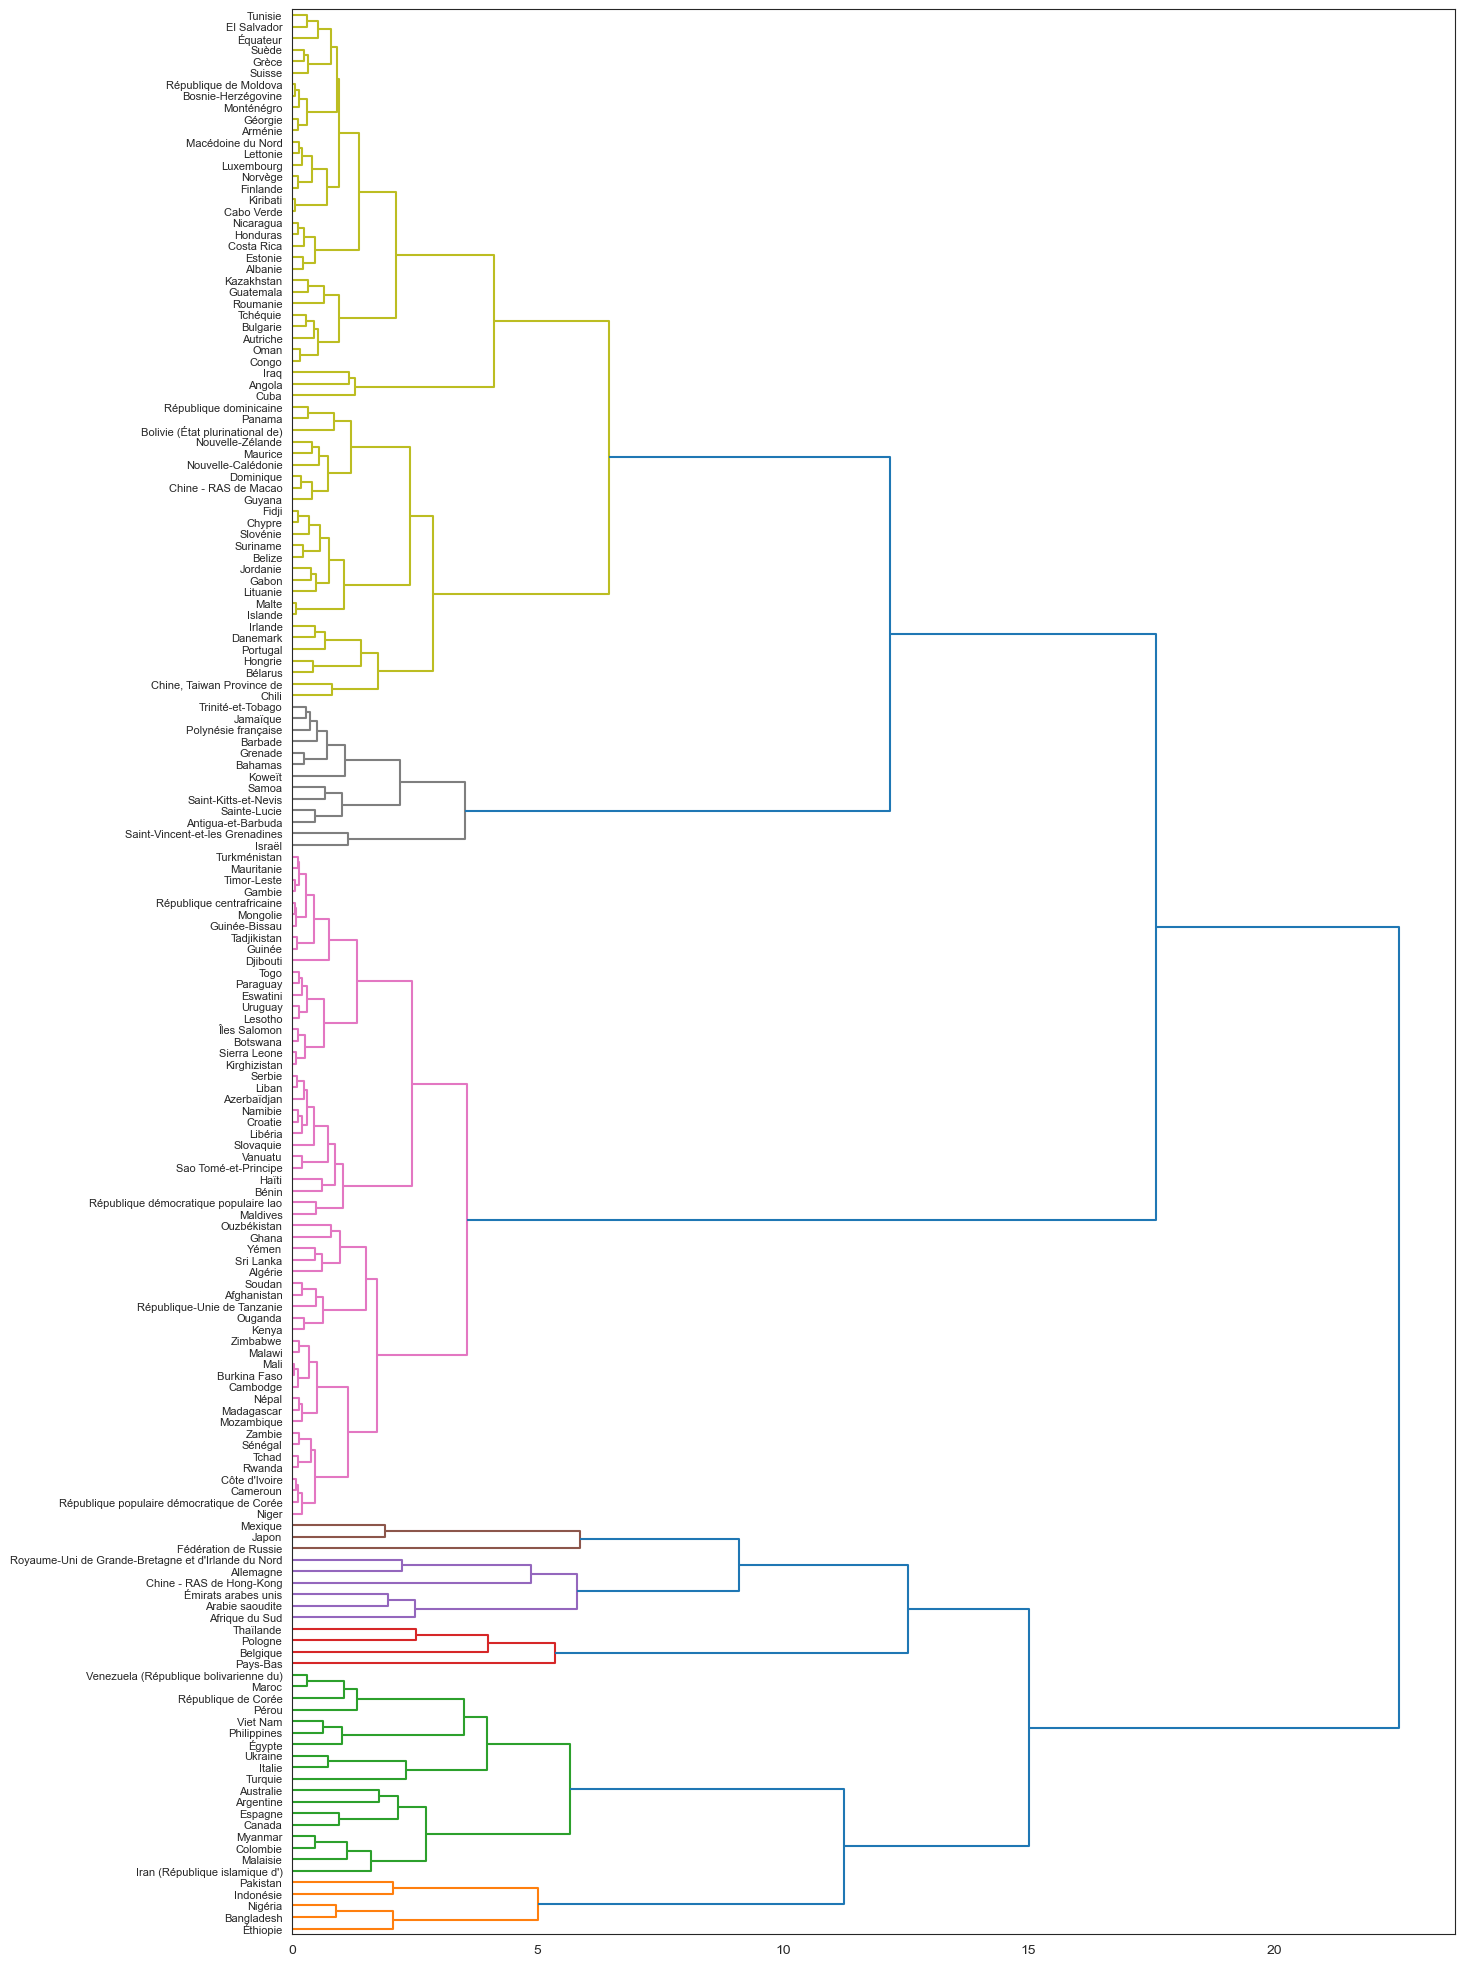

In [52]:
# Définit la taille du graphique.
plt.figure(figsize=(15,25))

# Paramétrage du dendrogramme
sns.set_style('white')
dendrogram(Z, labels = pays, orientation = 'right', leaf_font_size=8, color_threshold=7)

# Affiche le dendrogramme.
plt.show()

Pour rendre le dendrogramme lisible, on va le découper en cluster.

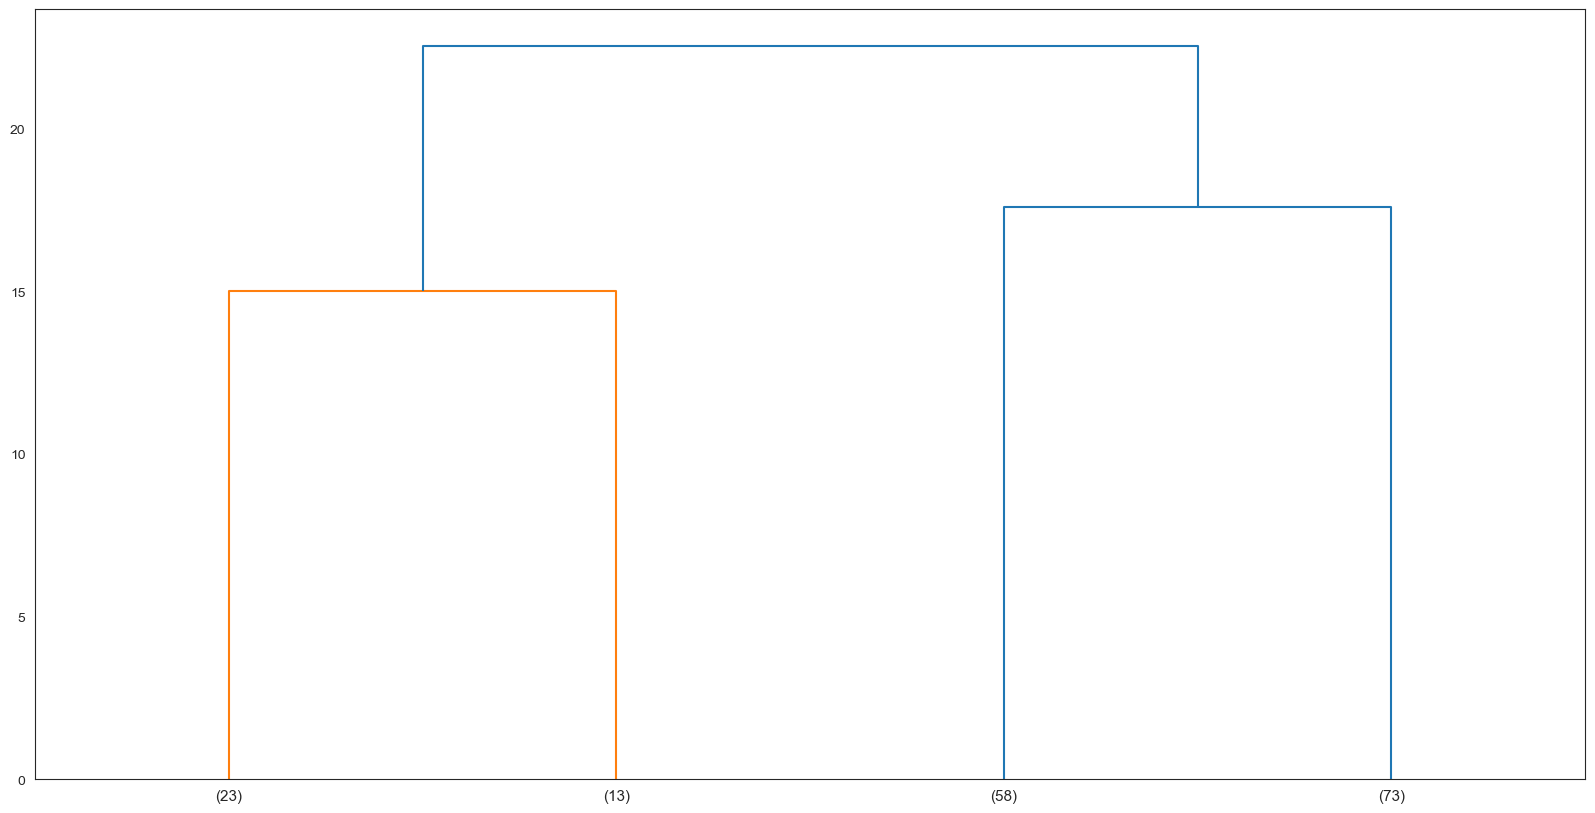

In [7]:
# Définit la taille du graphique.
plt.figure(figsize=(20,10))

# Paramétrage du dendrogramme, p=4 pour afficher en 4 clusters.
sns.set_style('white')
dendrogram(Z, labels = pays, p=4, truncate_mode='lastp', leaf_font_size=11)

# Affiche le dendrogramme.
plt.show()

### Attribution des clusters classification hiérarchique aux pays <a name="attribution_dendro"></a>

In [8]:
# Défini les clusters.
clusters_ch = fcluster(Z, 4, criterion='maxclust')

# Index triés des groupes.
idg = np.argsort(clusters_ch)

# Création du dataframe pour attribuer les pays aux clusters.
df_clusters_ch = pd.DataFrame(etude_poulet.index[idg], clusters_ch[idg]).reset_index()
df_clusters_ch = df_clusters_ch.rename(columns={'index' : 'ClusterCh'})

df_clusters_ch

,ClusterCh,Pays
0,1,Indonésie
1,1,Pakistan
2,1,Iran (République islamique d')
3,1,Myanmar
4,1,Colombie
...,...,...
162,4,Norvège
163,4,Grenade
164,4,Grèce
165,4,République dominicaine


In [9]:
# Jointure du dataframe cluster au dataframe etude_poulet.
etude_poulet = etude_poulet.merge(df_clusters_ch, on='Pays')

etude_poulet

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production,Population pour 1000,ClusterCh
0,Afghanistan,5.0,0.54,68.07,29.0,28.0,36296.113,3
1,Afrique du Sud,143.0,14.11,63.00,514.0,1667.0,57009.756,2
2,Albanie,85.0,6.26,0.00,38.0,13.0,2884.169,4
3,Algérie,22.0,1.97,0.00,2.0,275.0,41389.189,3
4,Allemagne,71.0,7.96,646.00,842.0,1514.0,82658.409,2
...,...,...,...,...,...,...,...,...
162,Égypte,50.0,4.51,1.00,110.0,1118.0,96442.591,1
163,Émirats arabes unis,147.0,14.80,94.00,433.0,48.0,9487.203,2
164,Équateur,83.0,6.15,0.00,0.0,340.0,16785.361,4
165,Éthiopie,0.0,0.04,68.07,1.0,14.0,106399.924,1


### Visualisation en Boxplots des clusters classification hiérarchique <a name="boxplot_dendro"></a>

In [10]:
df_box = etude_poulet.sort_values('ClusterCh')

def boxplot_cluster_ch(var):
    data_boxplot = []
    groupes_pays = df_box['ClusterCh'].unique()
    
    for groupe in groupes_pays :
        subset = df_box[df_box.ClusterCh == groupe]
        data_boxplot.append(subset[var])

    fig, ax1 = plt.subplots(figsize=(12, 8))
    fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

    bp = ax1.boxplot(data_boxplot, notch=0, vert=1, whis=1.5)

    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.4)
    ax1.set_axisbelow(True)
    ax1.set_title((var +' par cluster classification hiérarchique'), fontsize=22)
    ax1.set_ylabel(var)
    ax1.set_xlabel('Cluster')
    ax1.set_xlim(0, len(data_boxplot) + 0.5)

    plt.show()

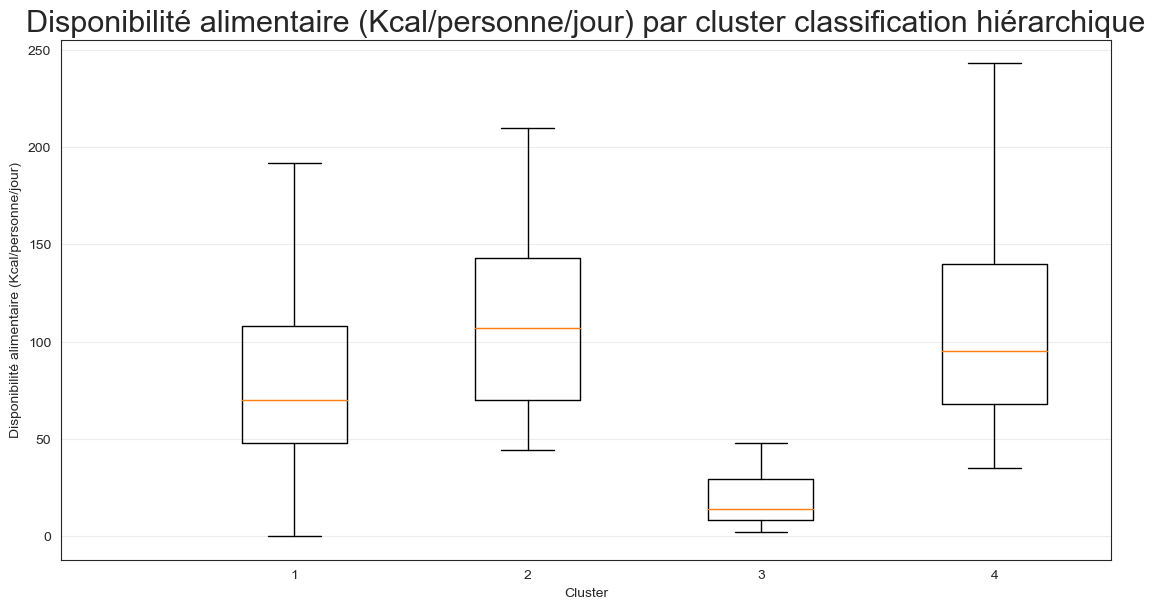

In [11]:
boxplot_cluster_ch('Disponibilité alimentaire (Kcal/personne/jour)')

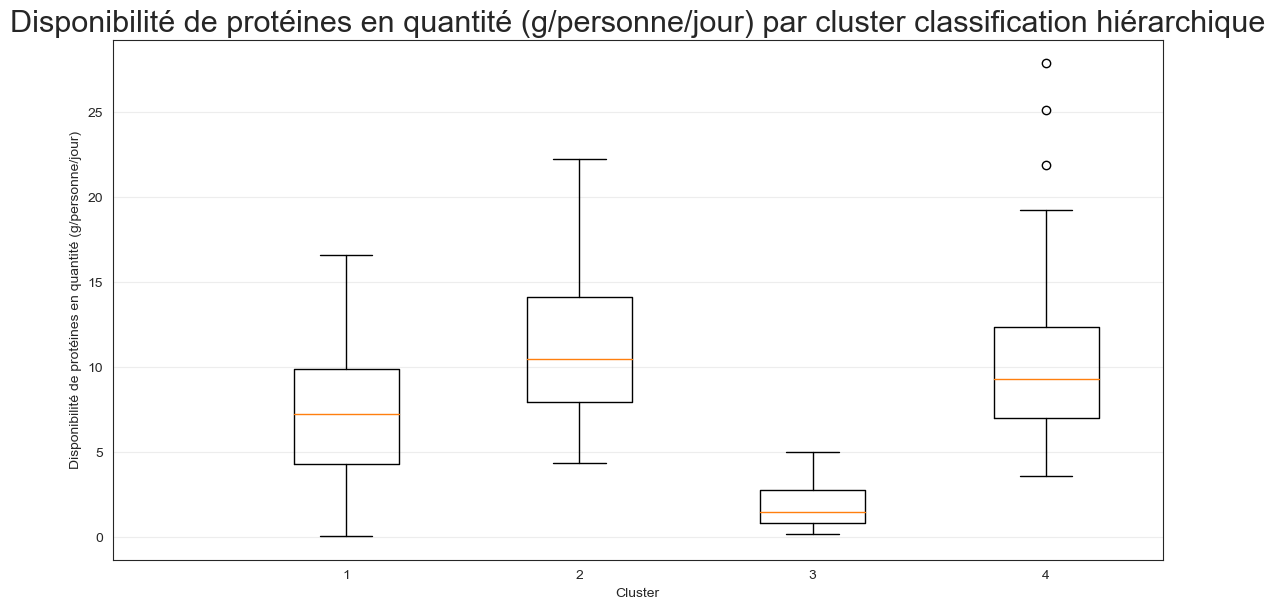

In [12]:
boxplot_cluster_ch('Disponibilité de protéines en quantité (g/personne/jour)')

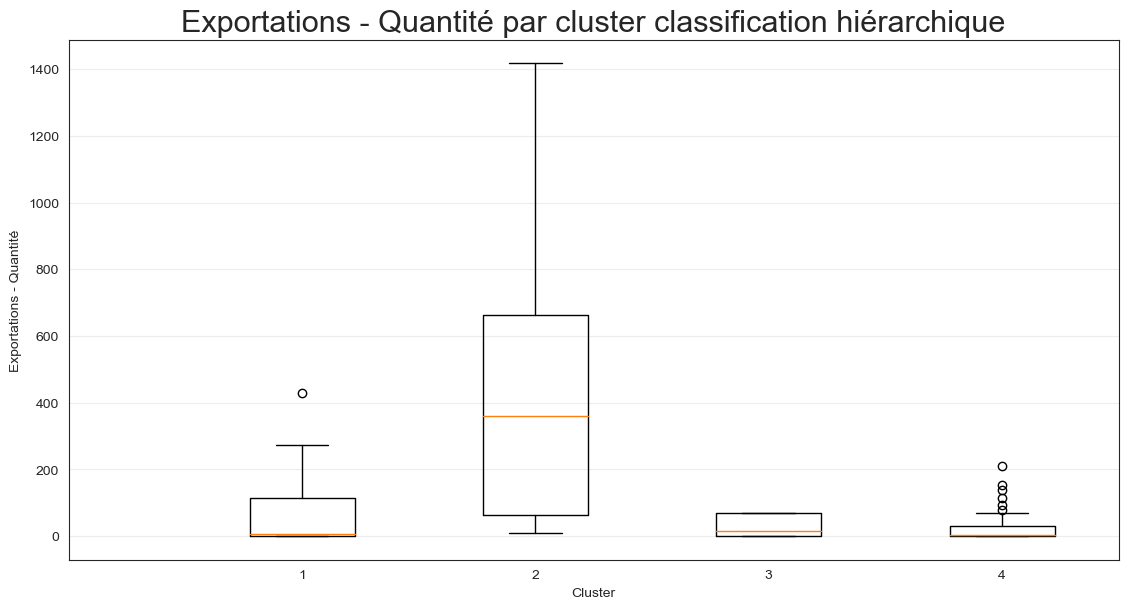

In [13]:
boxplot_cluster_ch('Exportations - Quantité')

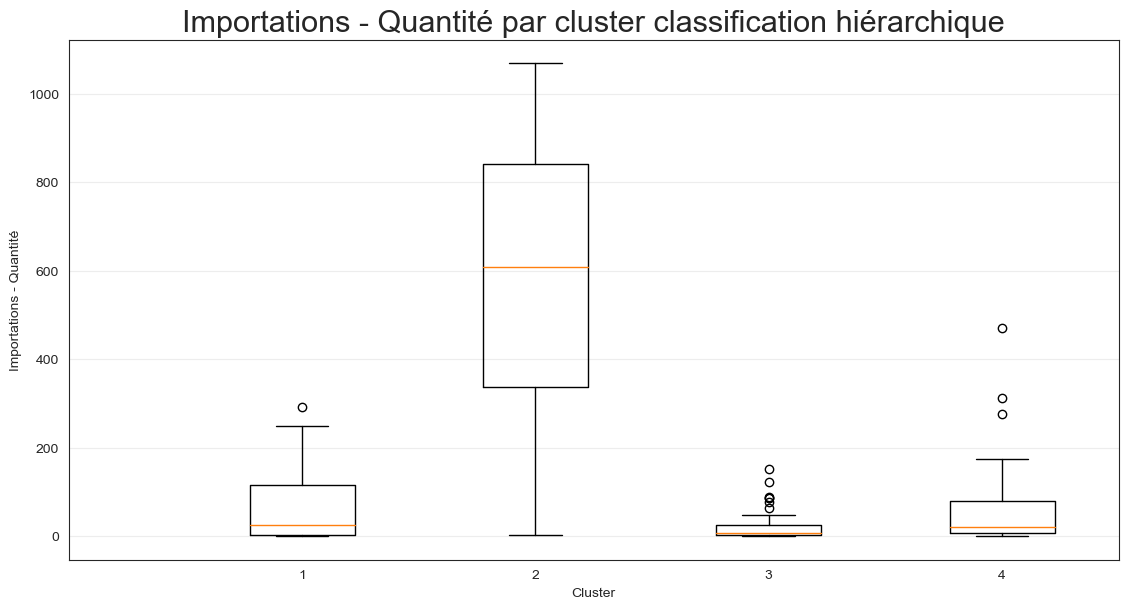

In [14]:
boxplot_cluster_ch('Importations - Quantité')

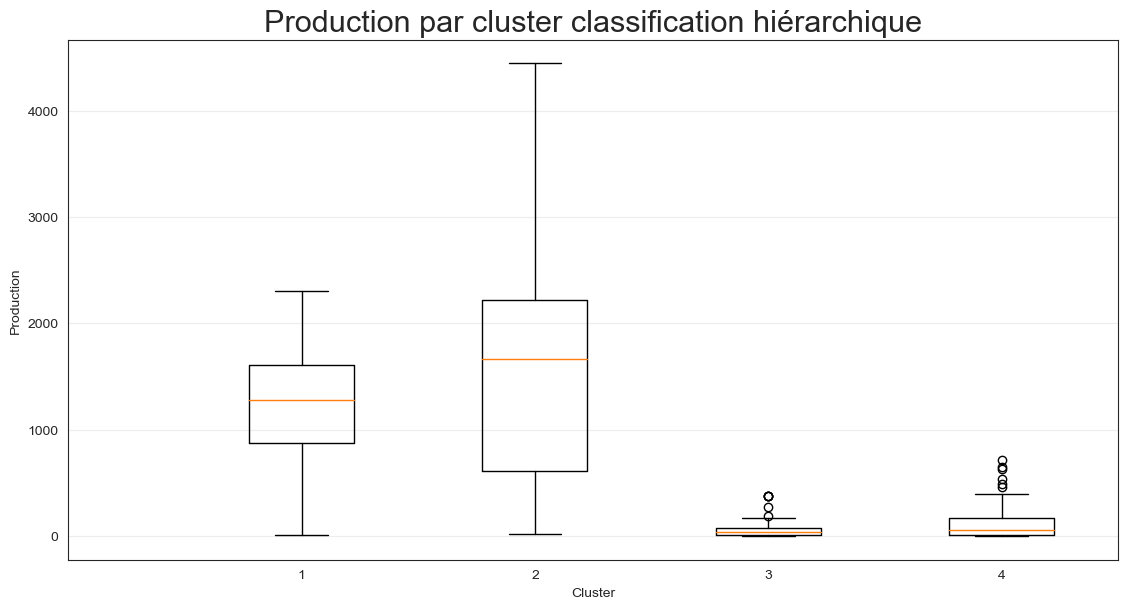

In [15]:
boxplot_cluster_ch('Production')

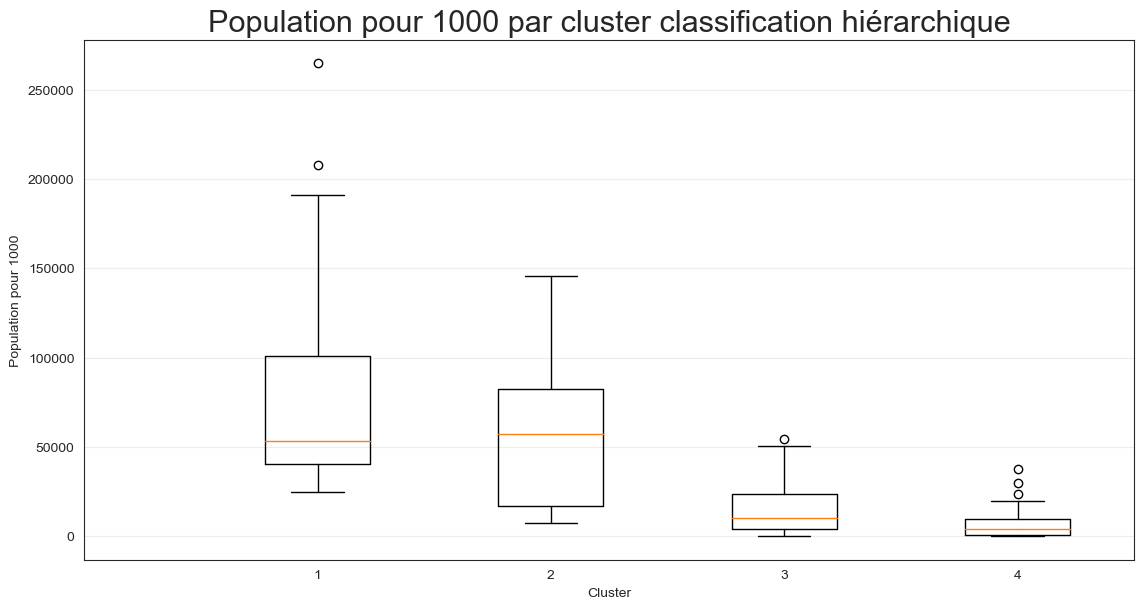

In [16]:
boxplot_cluster_ch('Population pour 1000')

Le choix du groupe se fait sur les critères suivants :
- Une disponibilité alimentaire et de protéine haute, cela montre une grande consommation de poulet.
- Une exportation basse car les pays qui exportent le plus de poulet, sont les pays qui n'en ont pas besoin.
- Une importation et une production haute car cela montre les pays qui ont le besoin de poulet.
- Une population importante.  

Les boxplots nous montrent que le groupe 2 correspond le mieux à ces différents critères.  

### Sélection des pays <a name="choix_dendro"></a>

In [17]:
df_select_pays_ch = etude_poulet[etude_poulet['ClusterCh'].isin([2]) == True]
df_select_pays_ch

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production,Population pour 1000,ClusterCh
1,Afrique du Sud,143.0,14.11,63.0,514.0,1667.0,57009.756,2
4,Allemagne,71.0,7.96,646.0,842.0,1514.0,82658.409,2
7,Arabie saoudite,151.0,15.57,10.0,722.0,616.0,33101.179,2
16,Belgique,44.0,4.57,656.0,338.0,463.0,11419.748,2
30,Chine - RAS de Hong-Kong,210.0,22.26,663.0,907.0,24.0,7306.322,2
49,Fédération de Russie,104.0,10.44,115.0,226.0,4444.0,145530.082,2
71,Japon,67.0,7.24,10.0,1069.0,2215.0,127502.725,2
94,Mexique,123.0,9.26,9.0,972.0,3249.0,124777.324,2
113,Pays-Bas,70.0,8.48,1418.0,608.0,1100.0,17021.347,2
115,Pologne,107.0,12.14,1025.0,55.0,2351.0,37953.180,2


Voici la liste des pays sélectionnés.

In [18]:
df_select_pays_ch['Pays'].unique()

array(['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Belgique',
       'Chine - RAS de Hong-Kong', 'Fédération de Russie', 'Japon',
       'Mexique', 'Pays-Bas', 'Pologne',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Thaïlande',
       'Émirats arabes unis'], dtype=object)

## ACP et Kmeans  <a name="kmeans"></a>

### Kmeans sur les données centrées réduites <a name="centrée_kmeans"></a>

In [19]:
# Clustering par K-means avec librairie sklearn sur les données centrées réduites.
km = KMeans(n_clusters=4, random_state=22)
km.fit(X_scaled)

KMeans(n_clusters=4, random_state=22)

In [20]:
# Récupération des clusters.
clusters_km = km.labels_ 
clusters_km

array([0, 2, 0, 0, 3, 0, 1, 1, 2, 0, 1, 0, 0, 1, 2, 1, 3, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 3, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0,
       1, 1, 1, 2, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0,
       2, 1, 0, 3, 2, 3, 1, 1, 2, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0])

### ACP - Eboulis des valeurs propres <a name="ACP_eboulis"></a>

In [21]:
# On instancie notre ACP. 
pca = PCA().fit(X_scaled)

In [22]:
# Pourcentage de variance expliqué par les composantes.
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([38.64, 31.67, 15.47,  9.71,  4.08,  0.43])

On remarque que les 3 premières composantes captent 85,78 % (38,64 + 31,67 + 15,47) de la variance. 

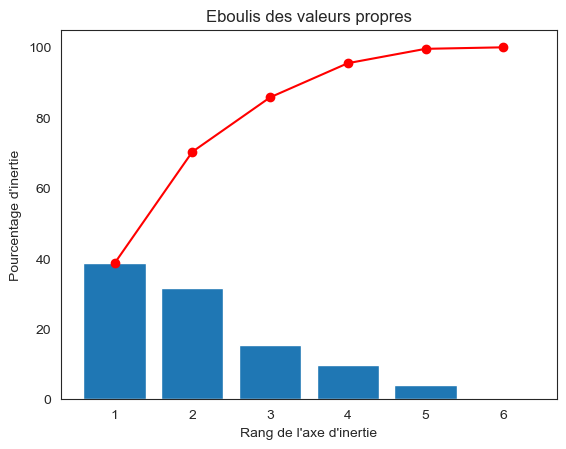

In [53]:
# Représentation graphique.
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show()

On remarque que les 3 premières composantes représente 85,78 %, une analyse sur le premier plan factoriel sera satisfaisante.  

### ACP - Cercle des corrélations <a name="ACP_corrélation"></a>

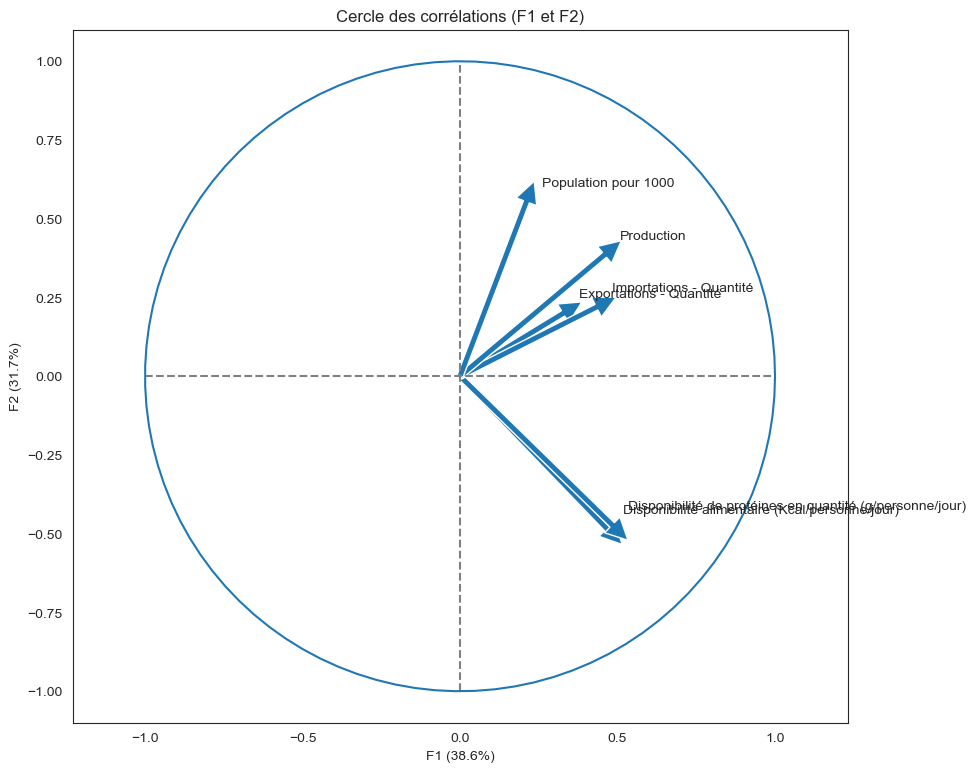

In [24]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 

    # Extrait x et y. 
    x,y=x_y

    # Taille de l'image (en inches).
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches.
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels.
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales.
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué.
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title('Cercle des corrélations (F{} et F{})'.format(x+1, y+1))

    # Le cercle. 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display.
    plt.axis('equal')
    plt.show(block=False)
    

correlation_graph(pca, (0,1), df_etude_clus.columns)

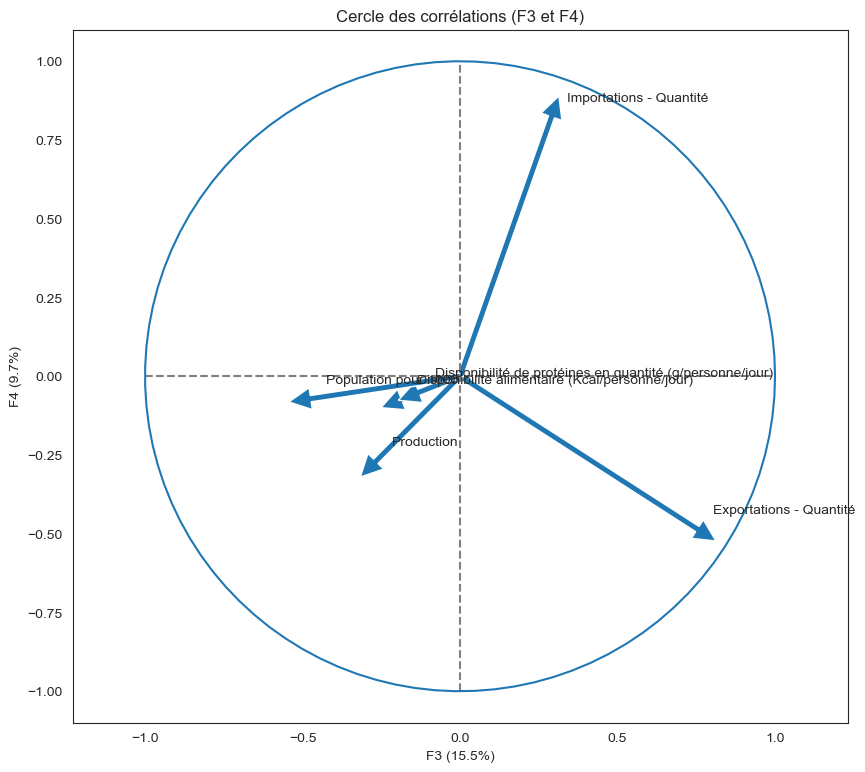

In [25]:
correlation_graph(pca, (2,3), df_etude_clus.columns)

En F1, toutes les variables sont corrélées, de plus, la disponibilité alimentaire et la disponibilité de protéines en quantité sont fortement corrélées entre elles.  
Pour la composante F2, la population, production, importation et exportation sont décorrélées par rapport à la disponibilité alimentaire et en protéines.  
En F3, l'importation et l'exportation sont bien représentées contrairement aux restes des variables.  
Pour la composante F4 l'importation et l'exportation sont décorélées entre elles.

### ACP - Projection sur plan factoriel <a name="ACP_projection"></a>

In [26]:
X_proj = pca.transform(X_scaled)

# Affichage sur plusieurs plans factoriels avec inertie des axes.
def plot_plans_factoriels(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None, centroid=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialisation de la figure.       
            fig = plt.figure(figsize=(12,8))
        
            # Affichage des points.
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Affichage des labels des points.
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Affichage des positions des centres de classes.
            if centroid is not None:
                centroids = km.cluster_centers_
                centroids_projected = pca.transform(centroids)
                for j,(x1,y1) in enumerate(centroids_projected[:,[d1,d2]]):
                    plt.scatter(x1,y1, c = 'red', marker='x', s=100, label='Centroides')
            
            # Détermination des limites du graphique.
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Affichage des lignes horizontales et verticales.
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title('Projection des {} individus sur F{} et F{}'.format(X_projected.shape[0], d1+1, d2+1), fontsize=22)
            plt.show(block=False)

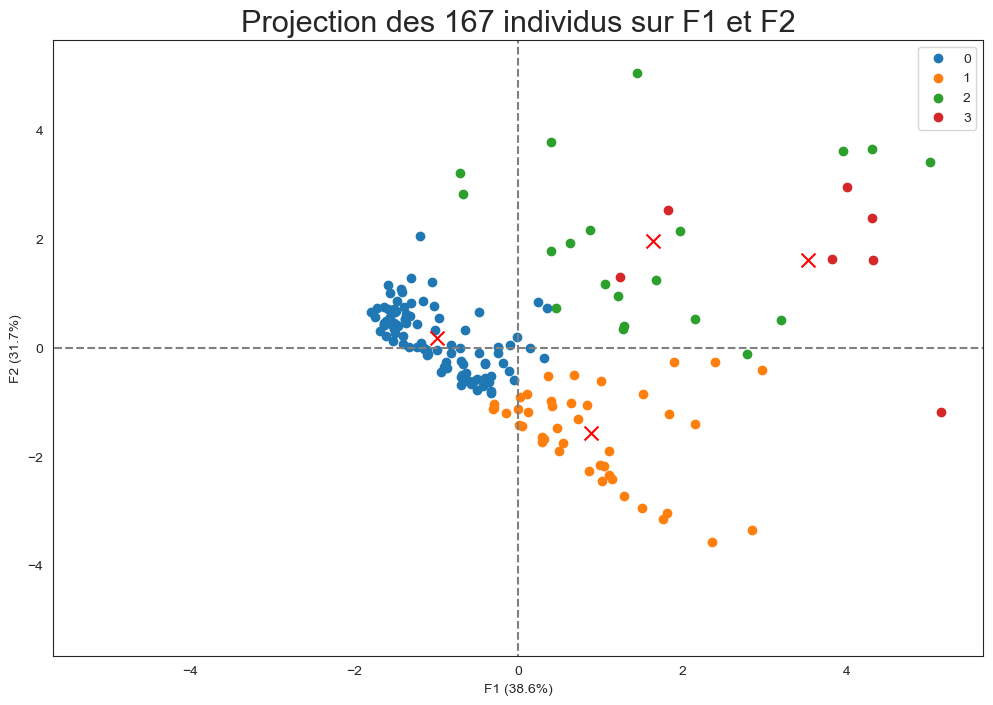

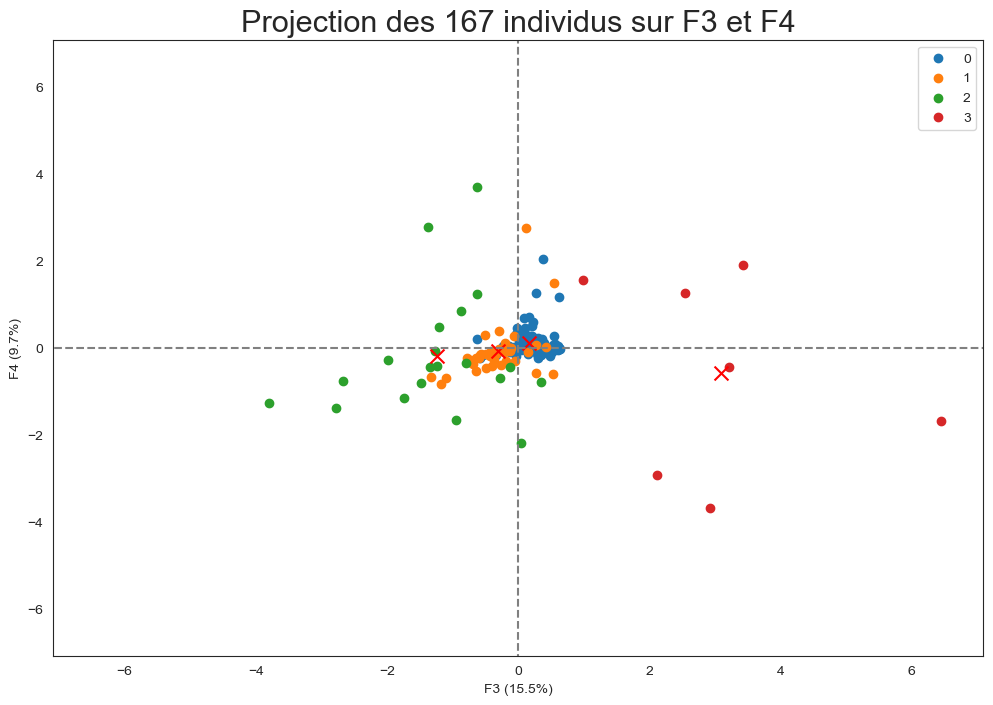

In [27]:
plot_plans_factoriels(X_proj, 4, pca, [(0,1),(2,3)], illustrative_var = clusters_km, centroid=1)

La projection nous permet de mieux représenter les groupes pour permettre une sélection.  
Les croix rouges montrent les centroïdes des clusters.  

### Métrique de l'inertie <a name="metrique"></a>

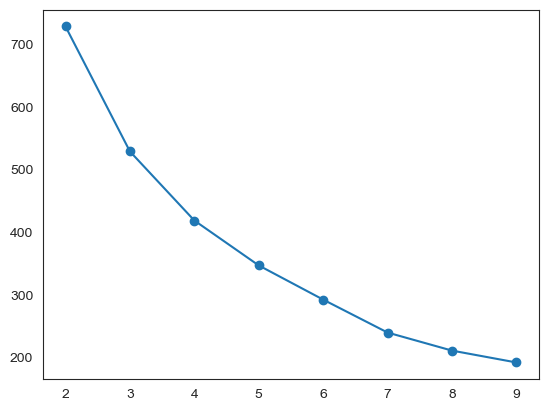

In [28]:
from sklearn import cluster

# On crée une liste dans laquelle on stocke les inerties.
inerties=[]

# On fait une boucle de 2 à 9 pour tester toutes ces possibiliéts.
for k in range(2, 10):
    #pour chaque k, on crée un modèle et on l’ajuste
    km = cluster.KMeans(n_clusters=k)
    km.fit(X_scaled)
    #on stocke l’inertie associée
    inerties.append(km.inertia_)

# Visualisation des valeurs d'inertie pour chaque nombre de cluster.
plt.plot(range(2, 10), inerties, marker='o')
plt.show()

L'inertie diminue rapidement entre les clusters 3 et 4.  
De plus, un nombre de clusters à 5 peuvent être aussi choisi.  
Le choix se porte sur un nombre de clusters à 4 car c'est là où la cassure est la plus importante.  

### Attribution des cluters Kmeans <a name="attribution_kmeans"></a>

In [29]:
etude_poulet['ClusterKm'] = clusters_km

etude_poulet

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production,Population pour 1000,ClusterCh,ClusterKm
0,Afghanistan,5.0,0.54,68.07,29.0,28.0,36296.113,3,0
1,Afrique du Sud,143.0,14.11,63.00,514.0,1667.0,57009.756,2,2
2,Albanie,85.0,6.26,0.00,38.0,13.0,2884.169,4,0
3,Algérie,22.0,1.97,0.00,2.0,275.0,41389.189,3,0
4,Allemagne,71.0,7.96,646.00,842.0,1514.0,82658.409,2,3
...,...,...,...,...,...,...,...,...,...
162,Égypte,50.0,4.51,1.00,110.0,1118.0,96442.591,1,2
163,Émirats arabes unis,147.0,14.80,94.00,433.0,48.0,9487.203,2,1
164,Équateur,83.0,6.15,0.00,0.0,340.0,16785.361,4,0
165,Éthiopie,0.0,0.04,68.07,1.0,14.0,106399.924,1,0


### Visualisation en Boxplots des clusters Kmeans <a name="boxplot_kmeans"></a>

In [30]:
df_box_km = etude_poulet.sort_values('ClusterKm')

def boxplot_cluster_km(var):
    data_boxplot = []
    groupes_pays = df_box_km['ClusterKm'].unique()
    
    for groupe in groupes_pays :
        subset = df_box_km[df_box_km.ClusterKm == groupe]
        data_boxplot.append(subset[var])

    fig, ax1 = plt.subplots(figsize=(12, 8))
    fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

    bp = ax1.boxplot(data_boxplot, notch=0, vert=1, whis=1.5, labels=['0', '1', '2', '3'])

    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.4)
    ax1.set_axisbelow(True)
    ax1.set_title((var +' par cluster Kmeans'), fontsize=22)
    ax1.set_ylabel(var)
    ax1.set_xlabel('Cluster')
    ax1.set_xlim(0, len(data_boxplot) + 0.5)

    plt.show()

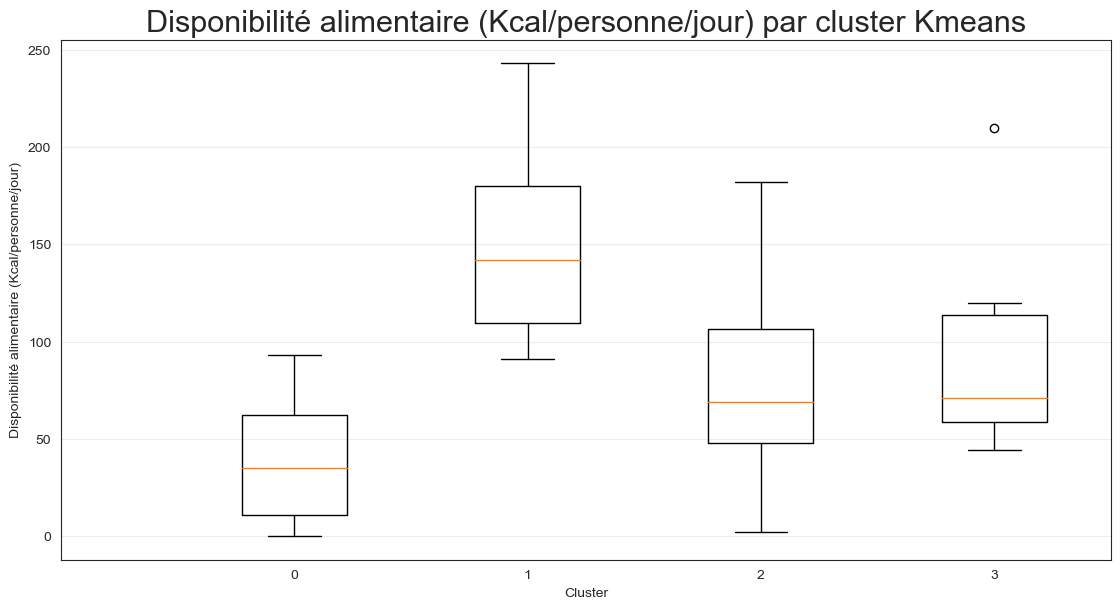

In [31]:
boxplot_cluster_km('Disponibilité alimentaire (Kcal/personne/jour)')

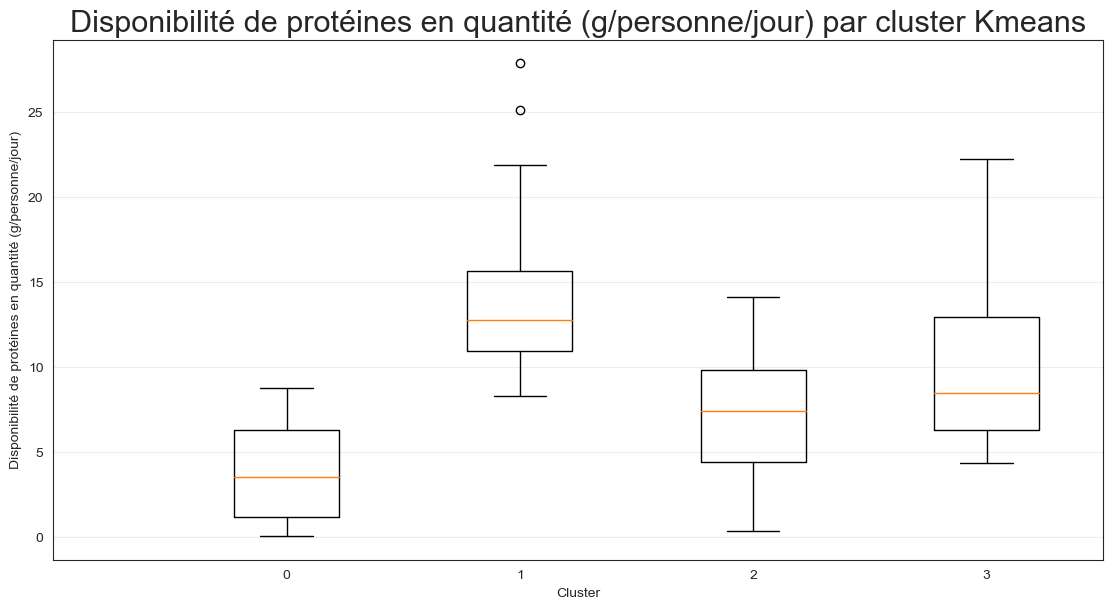

In [32]:
boxplot_cluster_km('Disponibilité de protéines en quantité (g/personne/jour)')

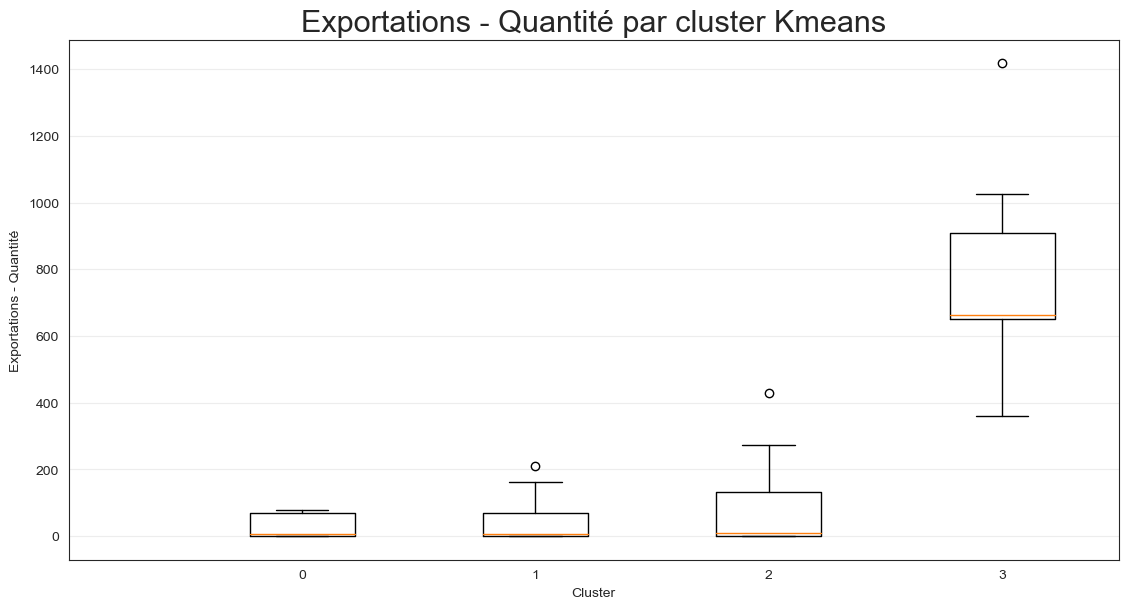

In [33]:
boxplot_cluster_km('Exportations - Quantité')

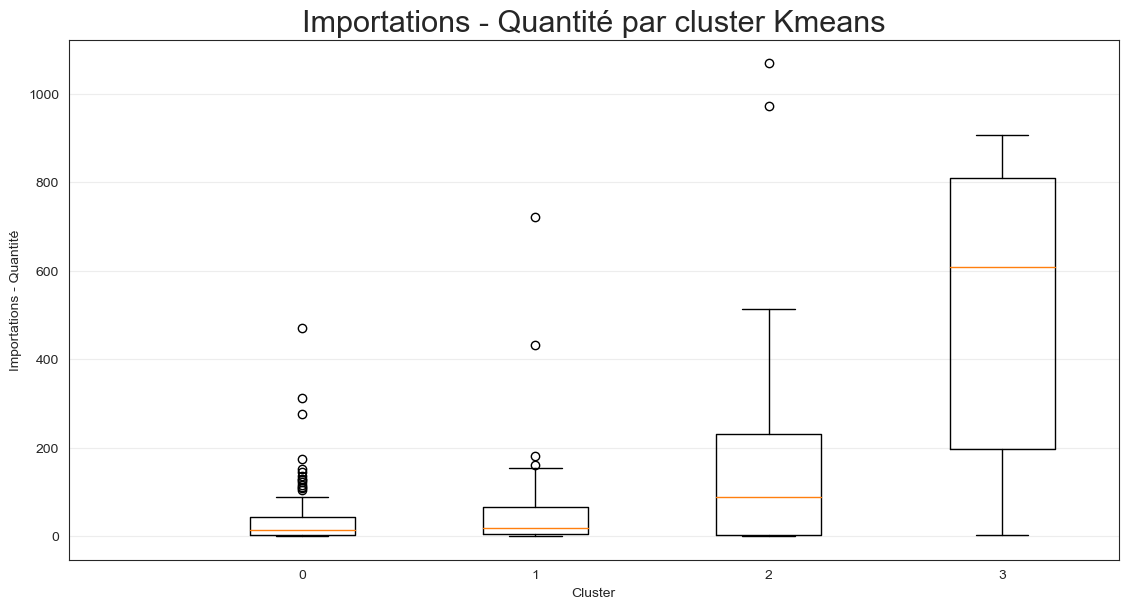

In [34]:
boxplot_cluster_km('Importations - Quantité')

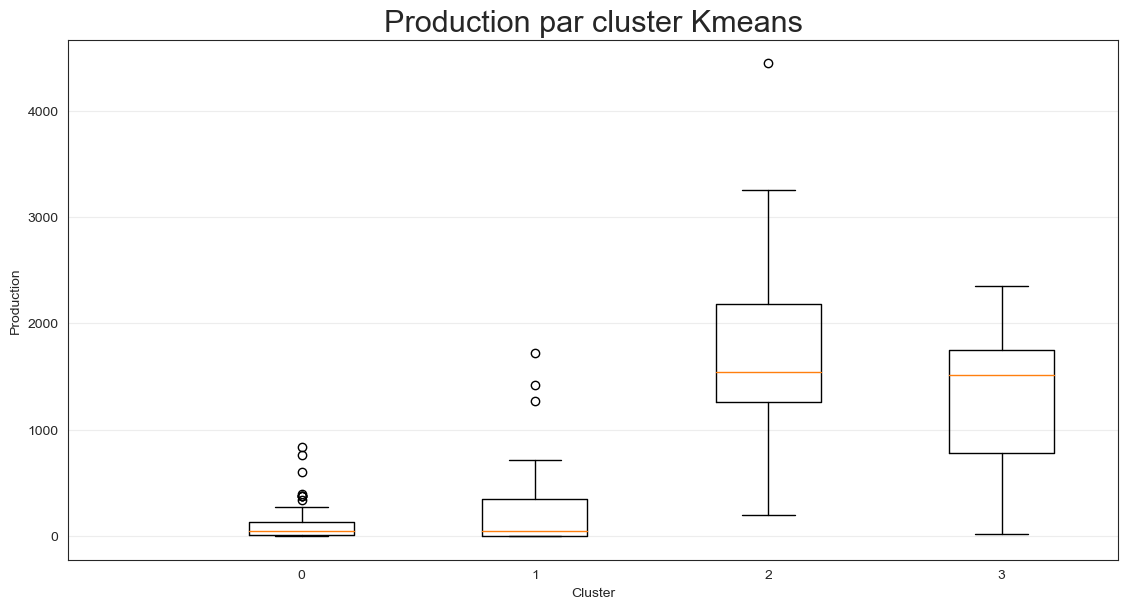

In [35]:
boxplot_cluster_km('Production')

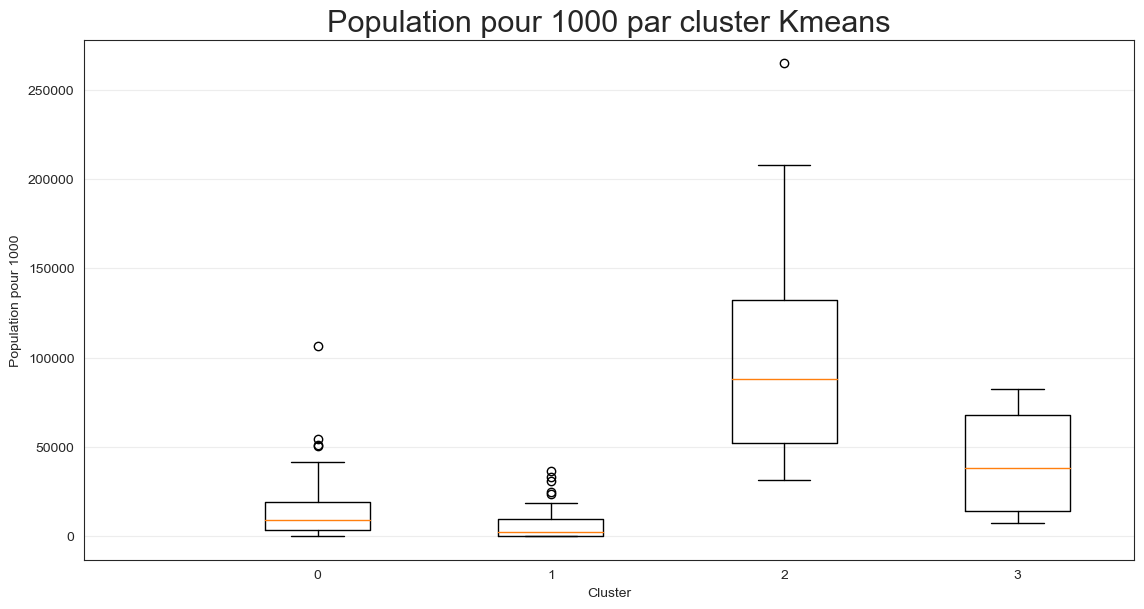

In [36]:
boxplot_cluster_km('Population pour 1000')

En prenant en compte les mêmes critères de sélection que précédemment, il y a deux groupes qui se détachent, le 1 et 3.  

### Sélection des pays <a name="choix_kmeans"></a>

In [37]:
df_select_pays_km = etude_poulet[etude_poulet['ClusterKm'].isin([1,3]) == True]

df_select_pays_km

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production,Population pour 1000,ClusterCh,ClusterKm
4,Allemagne,71.0,7.96,646.00,842.0,1514.0,82658.409,2,3
6,Antigua-et-Barbuda,233.0,17.77,0.00,7.0,0.0,95.426,4,1
7,Arabie saoudite,151.0,15.57,10.00,722.0,616.0,33101.179,2,1
10,Australie,192.0,16.60,42.00,16.0,1269.0,24584.620,1,1
13,Bahamas,182.0,14.61,68.07,24.0,6.0,381.755,4,1
15,Barbade,199.0,15.33,0.00,2.0,15.0,286.232,4,1
16,Belgique,44.0,4.57,656.00,338.0,463.0,11419.748,2,3
17,Belize,110.0,8.26,0.00,0.0,20.0,375.769,4,1
18,Bolivie (État plurinational de),155.0,11.43,1.00,1.0,533.0,11192.855,4,1
23,Bélarus,95.0,9.41,152.00,21.0,463.0,9450.231,4,1


La liste des pays choisis.

In [38]:
df_select_pays_km['Pays'].unique()

array(['Allemagne', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Australie',
       'Bahamas', 'Barbade', 'Belgique', 'Belize',
       'Bolivie (État plurinational de)', 'Bélarus', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, Taiwan Province de', 'Chypre', 'Danemark', 'Dominique',
       'Fidji', 'Gabon', 'Grenade', 'Guyana', 'Hongrie', 'Irlande',
       'Islande', 'Israël', 'Jamaïque', 'Jordanie', 'Koweït', 'Lituanie',
       'Malaisie', 'Malte', 'Maurice', 'Nouvelle-Calédonie',
       'Nouvelle-Zélande', 'Panama', 'Pays-Bas', 'Pologne',
       'Polynésie française', 'Portugal',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
       'République dominicaine', 'Saint-Kitts-et-Nevis',
       'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie', 'Samoa',
       'Suriname', 'Thaïlande', 'Trinité-et-Tobago',
       'Émirats arabes unis'], dtype=object)

## Sélection des pays pour le développement à l'international <a name="choix_pays"></a>

Pour choisir les pays, on met en comparaison les dataframes des pays sélectionnés par les 2 méthodes. Les pays qui se retrouvent dans les 2 dataframes, vont être les pays choisis.

In [39]:
# On merge (inner) les 2 dataframes.
df_final = df_select_pays_ch.merge(df_select_pays_km[['Pays','ClusterKm']], on='Pays')

df_final

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production,Population pour 1000,ClusterCh,ClusterKm
0,Allemagne,71.0,7.96,646.0,842.0,1514.0,82658.409,2,3
1,Arabie saoudite,151.0,15.57,10.0,722.0,616.0,33101.179,2,1
2,Belgique,44.0,4.57,656.0,338.0,463.0,11419.748,2,3
3,Chine - RAS de Hong-Kong,210.0,22.26,663.0,907.0,24.0,7306.322,2,3
4,Pays-Bas,70.0,8.48,1418.0,608.0,1100.0,17021.347,2,3
5,Pologne,107.0,12.14,1025.0,55.0,2351.0,37953.180,2,3
6,Royaume-Uni de Grande-Bretagne et d'Irlande du...,120.0,13.77,359.0,779.0,1814.0,66727.461,2,3
7,Thaïlande,47.0,4.35,796.0,2.0,1676.0,69209.810,2,3
8,Émirats arabes unis,147.0,14.80,94.0,433.0,48.0,9487.203,2,1


In [41]:
print("La liste des pays sélectionnés :\n")
for pays in df_final['Pays'].unique():
    print('-',pays)

La liste des pays sélectionnés :

- Allemagne
- Arabie saoudite
- Belgique
- Chine - RAS de Hong-Kong
- Pays-Bas
- Pologne
- Royaume-Uni de Grande-Bretagne et d'Irlande du Nord
- Thaïlande
- Émirats arabes unis
